# 1. Import claims_data.csv and cust_data.csv which is provided to you and combine the two datasets appropriately to create a 360-degree view of the data. Use the same for the subsequent questions.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf
import scipy.stats as stats
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [2]:
claim_data=pd.read_csv('C:/users/hp/claims.csv')
claim_data

,claim_id,customer_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent
0,54004764,21868593,Driver error,11/27/2017,Auto,No,Material only,$2980,1.0,No
1,33985796,75740424,Crime,10/03/2018,Home,Unknown,Material only,$2980,3.0,No
2,53522022,30308357,Other driver error,02/02/2018,Auto,No,Material only,$3369.5,1.0,Yes
3,13015401,47830476,Natural causes,06/17/2018,Auto,No,Material only,$1680,1.0,No
4,22890252,19269962,Crime,01/13/2018,Auto,No,Material only,$2680,1.0,No
...,...,...,...,...,...,...,...,...,...,...
1095,97727122,35951012,Other driver error,06/11/2017,Auto,No,Material only,$3059,4.0,Yes
1096,10247193,14818669,Natural causes,03/14/2018,Auto,No,Material only,$1520,2.0,No
1097,79807493,85322831,Other driver error,02/09/2018,Auto,No,Material and injury,$23575,2.0,Yes
1098,69299345,73449366,Other causes,03/21/2018,Auto,Unknown,Material and injury,$25120,1.0,No


In [3]:
cust_data=pd.read_csv('C:/users/hp/cust_demographics.csv')
cust_data


,CUST_ID,gender,DateOfBirth,State,Contact,Segment
0,21868593,Female,12-Jan-79,VT,789-916-8172,Platinum
1,75740424,Female,13-Jan-70,ME,265-543-1264,Silver
2,30308357,Female,11-Mar-84,TN,798-631-4758,Silver
3,47830476,Female,01-May-86,MA,413-187-7945,Silver
4,19269962,Male,13-May-77,NV,956-871-8691,Gold
...,...,...,...,...,...,...
1080,79539873,Female,15-Mar-81,ND,459-425-4319,Platinum
1081,42364152,Female,07-Jul-96,ID,529-462-1635,Silver
1082,19888166,Male,11-Apr-90,WI,712-651-9613,Gold
1083,11256802,Female,22-Oct-64,LA,469-345-5617,Silver


In [4]:
insurance_data=pd.merge(cust_data,claim_data,left_on='CUST_ID',right_on='customer_id',how='left')
insurance_data

,CUST_ID,gender,DateOfBirth,State,Contact,Segment,claim_id,customer_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent
0,21868593,Female,12-Jan-79,VT,789-916-8172,Platinum,54004764.0,21868593.0,Driver error,11/27/2017,Auto,No,Material only,$2980,1.0,No
1,75740424,Female,13-Jan-70,ME,265-543-1264,Silver,33985796.0,75740424.0,Crime,10/03/2018,Home,Unknown,Material only,$2980,3.0,No
2,30308357,Female,11-Mar-84,TN,798-631-4758,Silver,53522022.0,30308357.0,Other driver error,02/02/2018,Auto,No,Material only,$3369.5,1.0,Yes
3,30308357,Female,11-Mar-84,TN,798-631-4758,Silver,63017412.0,30308357.0,Driver error,04/04/2018,Auto,No,Material only,$1950,6.0,No
4,47830476,Female,01-May-86,MA,413-187-7945,Silver,13015401.0,47830476.0,Natural causes,06/17/2018,Auto,No,Material only,$1680,1.0,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1087,79539873,Female,15-Mar-81,ND,459-425-4319,Platinum,62020796.0,79539873.0,Other driver error,09/06/2018,Auto,Yes,Material only,$1770,1.0,No
1088,42364152,Female,07-Jul-96,ID,529-462-1635,Silver,63269067.0,42364152.0,Other causes,05/09/2017,Home,No,Material only,$2800,1.0,No
1089,19888166,Male,11-Apr-90,WI,712-651-9613,Gold,22690595.0,19888166.0,Other driver error,05/15/2017,Auto,Yes,Injury only,$33080,2.0,No
1090,11256802,Female,22-Oct-64,LA,469-345-5617,Silver,12376894.0,11256802.0,Other driver error,04/18/2017,Auto,No,Material only,$2840,4.0,No


# 2. Perform a data audit for the datatypes and find out if there are any mismatch within the current datatypes of the columns and their business significance.

In [5]:
insurance_data.dtypes

CUST_ID                  int64
gender                  object
DateOfBirth             object
State                   object
Contact                 object
Segment                 object
claim_id               float64
customer_id            float64
incident_cause          object
claim_date              object
claim_area              object
police_report           object
claim_type              object
claim_amount            object
total_policy_claims    float64
fraudulent              object
dtype: object

* claim_amount should have been float

# 3. Convert the column claim_amount to numeric. Use the appropriate modules/attributes to remove the $ sign.

In [6]:
insurance_data.head(2)

,CUST_ID,gender,DateOfBirth,State,Contact,Segment,claim_id,customer_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent
0,21868593,Female,12-Jan-79,VT,789-916-8172,Platinum,54004764.0,21868593.0,Driver error,11/27/2017,Auto,No,Material only,$2980,1.0,No
1,75740424,Female,13-Jan-70,ME,265-543-1264,Silver,33985796.0,75740424.0,Crime,10/03/2018,Home,Unknown,Material only,$2980,3.0,No


In [7]:
insurance_data.loc[:,'claim_amount']=insurance_data['claim_amount'].str.replace('$',' ').astype(float)

C:\Users\hp\AppData\Local\Temp\ipykernel_2004\1809047740.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  insurance_data.loc[:,'claim_amount']=insurance_data['claim_amount'].str.replace('$',' ').astype(float)


In [8]:
type(insurance_data.loc[:,'claim_amount'][1])

numpy.float64

In [9]:
insurance_data.claim_amount

0        2980.0
1        2980.0
2        3369.5
3        1950.0
4        1680.0
         ...   
1087     1770.0
1088     2800.0
1089    33080.0
1090     2840.0
1091     1490.0
Name: claim_amount, Length: 1092, dtype: float64

# 4. Of all the injury claims, some of them have gone unreported with the police. Create an alert flag (1,0) for all such claims.

In [10]:
insurance_data.loc[(insurance_data.claim_type=='Injury only')&(insurance_data.police_report=='Yes'),['claim_type','police_report']]

,claim_type,police_report
18,Injury only,Yes
23,Injury only,Yes
27,Injury only,Yes
50,Injury only,Yes
54,Injury only,Yes
...,...,...
1059,Injury only,Yes
1060,Injury only,Yes
1071,Injury only,Yes
1079,Injury only,Yes


In [11]:
insurance_data.loc[:,'flag']=np.where(insurance_data.police_report=='No',0,np.where(insurance_data.police_report=='Unknown',1,'Yes'))

In [12]:
insurance_data.loc[insurance_data.claim_type=='Injury only',['claim_type','police_report','flag']]

,claim_type,police_report,flag
8,Injury only,No,0
18,Injury only,Yes,Yes
21,Injury only,No,0
22,Injury only,No,0
23,Injury only,Yes,Yes
...,...,...,...
1069,Injury only,No,0
1071,Injury only,Yes,Yes
1079,Injury only,Yes,Yes
1081,Injury only,Unknown,1


# 5. One customer can claim for insurance more than once and in each claim,multiple categories of claims can be involved. However, customer ID should remain unique.
## Retain the most recent observation and delete any duplicated records in the data based on the customer ID column.

In [13]:
insurance_data.loc[:,'Year']=pd.to_datetime(insurance_data.claim_date).dt.year

In [14]:
insurance_data=insurance_data.sort_values(by='Year',axis=0,ascending=False).drop_duplicates(subset='CUST_ID',keep='first')

In [15]:
insurance_data.CUST_ID.value_counts()

9600820     1
64840478    1
94267140    1
5637733     1
65047878    1
           ..
97169446    1
14433043    1
16906248    1
2632562     1
70659761    1
Name: CUST_ID, Length: 1085, dtype: int64

# 6. Check for missing values and impute the missing values with an appropriate value. (mean for continuous and mode for categorical)

In [16]:
insurance_data.select_dtypes('number').columns

Index(['CUST_ID', 'claim_id', 'customer_id', 'claim_amount',
       'total_policy_claims', 'Year'],
      dtype='object')

In [17]:
insurance_data.select_dtypes('object').columns

Index(['gender', 'DateOfBirth', 'State', 'Contact', 'Segment',
       'incident_cause', 'claim_date', 'claim_area', 'police_report',
       'claim_type', 'fraudulent', 'flag'],
      dtype='object')

In [18]:
insurance_data.loc[:,'Year']=insurance_data.Year.astype('object')

In [19]:
insurance_data.dtypes

CUST_ID                  int64
gender                  object
DateOfBirth             object
State                   object
Contact                 object
Segment                 object
claim_id               float64
customer_id            float64
incident_cause          object
claim_date              object
claim_area              object
police_report           object
claim_type              object
claim_amount           float64
total_policy_claims    float64
fraudulent              object
flag                    object
Year                    object
dtype: object

In [20]:
insurance_data.loc[insurance_data.claim_id.isnull(),'claim_id']=insurance_data.loc[insurance_data.claim_id.isnull(),'claim_id'].fillna(insurance_data.claim_id.mean())

In [21]:
insurance_data.loc[insurance_data.customer_id.isnull(),'customer_id']=insurance_data.loc[insurance_data.customer_id.isnull(),'customer_id'].fillna(insurance_data.customer_id.mean())

In [22]:
insurance_data.loc[insurance_data.total_policy_claims.isnull(),'total_policy_claims']=insurance_data.loc[insurance_data.total_policy_claims.isnull(),'total_policy_claims'].fillna(insurance_data.total_policy_claims.mean())

In [23]:
insurance_data.loc[insurance_data.incident_cause.isnull(),'incident_cause']=insurance_data.loc[insurance_data.incident_cause.isnull(),'incident_cause'].fillna(insurance_data.incident_cause.mode())

In [24]:
insurance_data.loc[insurance_data.incident_cause.isnull(),'incident_cause']=insurance_data.loc[insurance_data.incident_cause.isnull(),'incident_cause'].fillna('Other causes')

In [25]:
insurance_data.incident_cause.mode()

0    Other causes
Name: incident_cause, dtype: object

In [26]:
insurance_data.loc[insurance_data.Year.isnull(),'Year']=insurance_data.loc[insurance_data.Year.isnull(),'Year'].fillna('2017')

In [27]:
insurance_data.Year.mode()

0    2017.0
Name: Year, dtype: object

In [28]:
insurance_data.loc[insurance_data.claim_date.isnull(),'claim_date']=insurance_data.loc[insurance_data.claim_date.isnull(),'claim_date'].fillna('04/04/2018')

In [29]:
insurance_data.claim_date.mode()

0    04/04/2018
Name: claim_date, dtype: object

In [30]:
insurance_data.loc[insurance_data.claim_area.isnull(),'claim_area']=insurance_data.loc[insurance_data.claim_area.isnull(),'claim_area'].fillna('Auto')

In [31]:
insurance_data.claim_area.mode()

0    Auto
Name: claim_area, dtype: object

In [32]:
insurance_data.loc[insurance_data.police_report.isnull(),'police_report']=insurance_data.loc[insurance_data.police_report.isnull(),'police_report'].fillna('No')

In [33]:
insurance_data.police_report.mode()

0    No
Name: police_report, dtype: object

In [34]:
insurance_data.loc[insurance_data.claim_type.isnull(),'claim_type']=insurance_data.loc[insurance_data.claim_type.isnull(),'claim_type'].fillna('Material only')

In [35]:
insurance_data.claim_type.mode()

0    Material only
Name: claim_type, dtype: object

In [36]:
insurance_data.loc[insurance_data.claim_amount.isnull(),'claim_amount']=insurance_data.loc[insurance_data.claim_amount.isnull(),'claim_amount'].fillna(insurance_data.claim_amount.mean())

In [37]:
insurance_data.claim_amount.mean()

12501.72655478778

In [38]:
insurance_data.loc[insurance_data.fraudulent.isnull(),'fraudulent']=insurance_data.loc[insurance_data.fraudulent.isnull(),'fraudulent'].fillna('No')

In [39]:
insurance_data.fraudulent.mode()

0    No
Name: fraudulent, dtype: object

# 7. Calculate the age of customers in years. Based on the age, categorize the customers according to the below criteria
## Children < 18
## Youth 18-30
## Adult 30-60
## Senior > 60

In [40]:
insurance_data.loc[:,'DateOfBirth2']=pd.to_datetime(insurance_data.DateOfBirth)

In [41]:
insurance_data.loc[:,'Day']=insurance_data.DateOfBirth2.dt.day

In [42]:
insurance_data.loc[:,'month']=insurance_data.DateOfBirth2.dt.month

In [43]:
insurance_data.loc[:,'Year2']=insurance_data.DateOfBirth2.dt.year

In [44]:
insurance_data.loc[:,'Year3']=np.where(insurance_data.Year2>2023,insurance_data.Year2-100,insurance_data.Year2)

In [45]:
insurance_data.loc[:,'Final_DateOfBirth']=insurance_data.Day.astype(str)+'-'+insurance_data.month.astype(str)+'-'+insurance_data.Year3.astype(str)

In [46]:
insurance_data.loc[:,'Final_DateOfBirth']

542    19-2-1962
426    25-7-1997
414    26-8-1983
416    28-7-1971
853     5-7-1969
         ...    
609    22-7-1980
636     4-6-1984
637    25-5-1984
638     6-8-1996
639    25-6-1994
Name: Final_DateOfBirth, Length: 1085, dtype: object

In [47]:
insurance_data.loc[:,'AgeFinal']=round(((pd.Timestamp.today()-pd.to_datetime(insurance_data.Final_DateOfBirth)).dt.days)/365.25,0)

C:\Users\hp\AppData\Local\Temp\ipykernel_2004\3699852308.py:1: UserWarning: Parsing '25-10-1993' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  insurance_data.loc[:,'AgeFinal']=round(((pd.Timestamp.today()-pd.to_datetime(insurance_data.Final_DateOfBirth)).dt.days)/365.25,0)
C:\Users\hp\AppData\Local\Temp\ipykernel_2004\3699852308.py:1: UserWarning: Parsing '28-12-1983' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  insurance_data.loc[:,'AgeFinal']=round(((pd.Timestamp.today()-pd.to_datetime(insurance_data.Final_DateOfBirth)).dt.days)/365.25,0)
C:\Users\hp\AppData\Local\Temp\ipykernel_2004\3699852308.py:1: UserWarning: Parsing '20-12-1972' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  insurance_data.loc[:,'AgeFinal']=round(((pd.Timestamp.today()-pd.to_datetime(insurance_data.Final_DateOfBirth)).dt.days)/365.25,0)
C:\Users\hp\A

C:\Users\hp\AppData\Local\Temp\ipykernel_2004\3699852308.py:1: UserWarning: Parsing '31-10-1999' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  insurance_data.loc[:,'AgeFinal']=round(((pd.Timestamp.today()-pd.to_datetime(insurance_data.Final_DateOfBirth)).dt.days)/365.25,0)
C:\Users\hp\AppData\Local\Temp\ipykernel_2004\3699852308.py:1: UserWarning: Parsing '13-12-1981' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  insurance_data.loc[:,'AgeFinal']=round(((pd.Timestamp.today()-pd.to_datetime(insurance_data.Final_DateOfBirth)).dt.days)/365.25,0)
C:\Users\hp\AppData\Local\Temp\ipykernel_2004\3699852308.py:1: UserWarning: Parsing '14-12-1981' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  insurance_data.loc[:,'AgeFinal']=round(((pd.Timestamp.today()-pd.to_datetime(insurance_data.Final_DateOfBirth)).dt.days)/365.25,0)
C:\Users\hp\A

In [48]:
insurance_data.loc[:,'AgeFinal']

542    61.0
426    25.0
414    39.0
416    51.0
853    54.0
       ... 
609    42.0
636    39.0
637    39.0
638    27.0
639    29.0
Name: AgeFinal, Length: 1085, dtype: float64

Children < 18
Youth 18-30
Adult 30-60
Senior > 60

In [49]:
insurance_data.loc[:,'AgeCategory']=np.where(insurance_data.AgeFinal<18,'Children',np.where(insurance_data.AgeFinal.between(18,30,inclusive='both'),'Youth',np.where(insurance_data.AgeFinal.between(30,60,inclusive='right'),'Adult','Senior')))

In [50]:
insurance_data.loc[:,['AgeFinal','AgeCategory']]

,AgeFinal,AgeCategory
542,61.0,Senior
426,25.0,Youth
414,39.0,Adult
416,51.0,Adult
853,54.0,Adult
...,...,...
609,42.0,Adult
636,39.0,Adult
637,39.0,Adult
638,27.0,Youth


# 8. What is the average amount claimed by the customers from various segments?

In [51]:
insurance_data.groupby(['CUST_ID','Segment'])['claim_amount'].mean()

CUST_ID   Segment 
154557    Platinum    12501.726555
263204    Silver      39192.000000
287476    Silver       1621.500000
441097    Gold        37040.000000
524545    Gold        35250.000000
                          ...     
99674324  Silver      21480.000000
99723844  Gold        14360.000000
99761663  Silver       1242.000000
99892000  Gold         2415.000000
99961993  Platinum     2310.000000
Name: claim_amount, Length: 1085, dtype: float64

# 9. What is the total claim amount based on incident cause for all the claims that have been done at least 20 days prior to 1st of October, 2018.

In [52]:
insurance_data.claim_date=pd.to_datetime(insurance_data.claim_date)

In [53]:
insurance_data.claim_date

542   2018-09-06
426   2018-05-21
414   2018-09-06
416   2018-09-12
853   2018-02-22
         ...    
609   2018-04-04
636   2018-04-04
637   2018-04-04
638   2018-04-04
639   2018-04-04
Name: claim_date, Length: 1085, dtype: datetime64[ns]

In [54]:
prior=pd.Timestamp('2018-10-01')-pd.DateOffset(days=20)
prior

Timestamp('2018-09-11 00:00:00')

In [55]:
insurance_data.loc[(insurance_data.claim_date.between(prior,'2018-10-01'))].groupby(['incident_cause','claim_type'])['claim_amount'].sum()

incident_cause      claim_type         
Crime               Material only            6840.000000
Driver error        Material and injury     12501.726555
                    Material only            2130.000000
Natural causes      Material only            8418.000000
Other causes        Injury only             91302.000000
                    Material and injury    136714.000000
                    Material only           19241.726555
Other driver error  Material and injury     36620.000000
                    Material only           10979.500000
Name: claim_amount, dtype: float64

# 10. How many adults from TX, DE and AK claimed insurance for driver related issues and causes?

In [56]:
len(insurance_data.loc[((insurance_data.State.isin(['TX','DE','AK']))&(insurance_data.incident_cause=='Other driver error'))])

13

# 11. Draw a pie chart between the aggregated value of claim amount based on gender and segment. Represent the claim amount as a percentage on the pie chart.

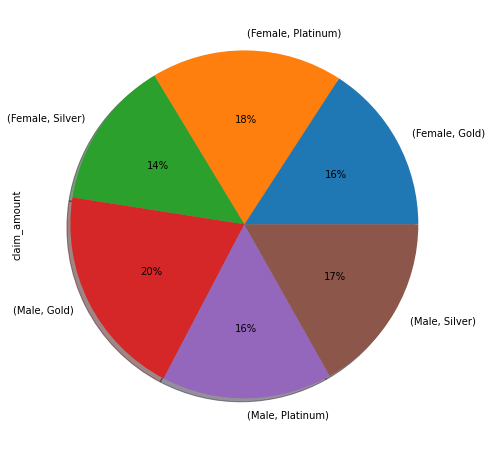

In [64]:
plt.figure(figsize=(8,8))
round((insurance_data.groupby(['gender','Segment'])['claim_amount'].sum()/insurance_data.claim_amount.sum())*100,0).plot(kind='pie',shadow=True,autopct='%1.0f%%')
plt.show()

# 12. Among males and females, which gender had claimed the most for any type of driver related issues? E.g. This metric can be compared using a bar chart

In [58]:
insurance_data.loc[insurance_data.incident_cause=='Other driver error'].groupby('gender')['incident_cause'].count()

gender
Female    148
Male       95
Name: incident_cause, dtype: int64

# 13. Which age group had the maximum fraudulent policy claims? Visualize it on a bar chart.

In [59]:
insurance_data.loc[insurance_data.fraudulent=='Yes'].groupby('AgeCategory')['fraudulent'].count()

AgeCategory
Adult     188
Senior     15
Youth      42
Name: fraudulent, dtype: int64

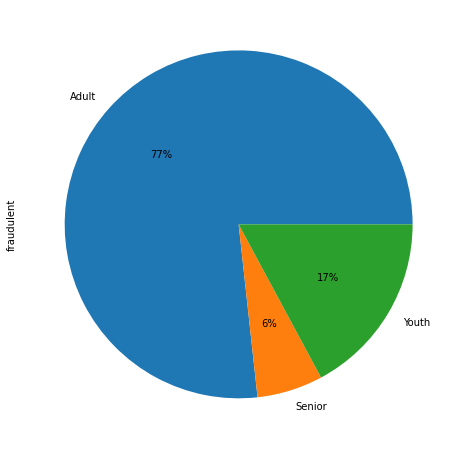

In [60]:
plt.figure(figsize=(8,8))
(((insurance_data.loc[insurance_data.fraudulent=='Yes'].groupby('AgeCategory')['fraudulent'].count())/(insurance_data.loc[insurance_data.fraudulent=='Yes'].groupby('AgeCategory')['fraudulent'].count().sum()))*100).plot(kind='pie',autopct='%1.0f%%')
plt.show()

# 14. Visualize the monthly trend of the total amount that has been claimed by  he customers. Ensure that on the “month” axis, the month is in a chronological order not alphabetical order.

<function matplotlib.pyplot.show(close=None, block=None)>

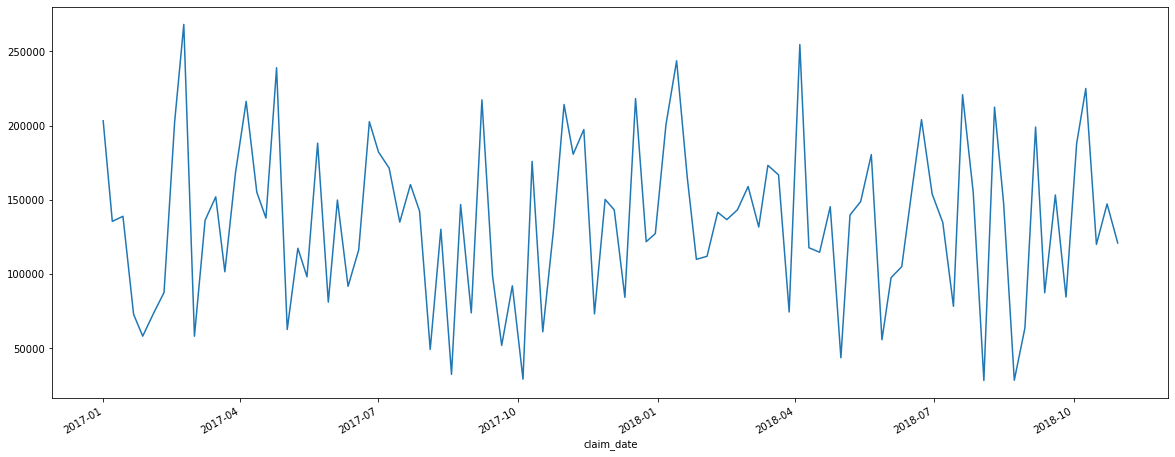

In [61]:
plt.figure(figsize=(20,8))
insurance_data.groupby(pd.to_datetime(insurance_data.claim_date))['claim_amount'].sum().plot(kind='line')
plt.show

# 15. What is the average claim amount for gender and age categories and suitably represent the above using a facetted bar chart, one facet that represents fraudulent claims and the other for non-fraudulent claims.

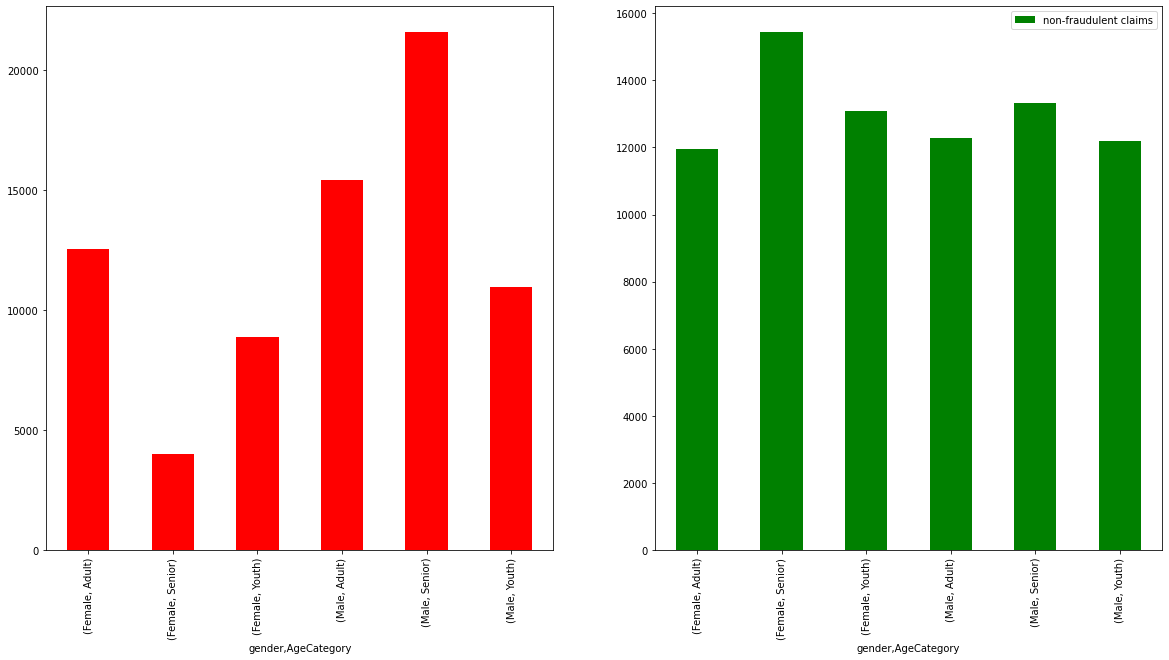

In [62]:
fig,ax=plt.subplots(1,2,figsize=(20,10))
insurance_data.loc[insurance_data.fraudulent=='Yes'].groupby(['gender','AgeCategory'])['claim_amount'].mean().plot(kind='bar',ax=ax[0],label='fraudulent claims',color='red')
insurance_data.loc[insurance_data.fraudulent=='No'].groupby(['gender','AgeCategory'])['claim_amount'].mean().plot(kind='bar',ax=ax[1],label='non-fraudulent claims',color='green')
plt.legend()
plt.show()

# Based on the conclusions from exploratory analysis as well as suitable statistical tests, answer the below questions. Please include a detailed write-up on the parameters taken into consideration, the Hypothesis testing steps, conclusion from the p-values and the business implications of the statements.
## 16. Is there any similarity in the amount claimed by males and females?

In [69]:
Male_amount=insurance_data.loc[insurance_data.gender=='Male','claim_amount']

In [76]:
Male_amount.mean()

12883.459510093911

In [70]:
female_amount=insurance_data.loc[insurance_data.gender=='Female','claim_amount']

In [77]:
female_amount.mean()

12104.925193351097

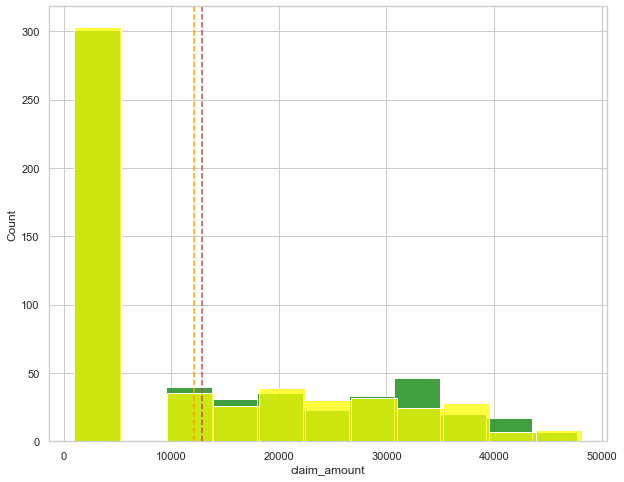

In [119]:
plt.figure(figsize=(10,8))
sns.set(style='whitegrid')
sns.histplot(Male_amount,color='green')
sns.histplot(female_amount,color='yellow')
plt.axvline(Male_amount.mean(),linestyle='--',color='r')
plt.axvline(female_amount.mean(),linestyle='--',color='orange')
plt.show()

In [99]:
stats.ttest_ind(Male_amount,female_amount)

Ttest_indResult(statistic=0.9624541122991915, pvalue=0.3360363827572097)

In [102]:
#H0:we assume that no similarity between Male claim amount and Female claim amount
#Ha:both are dependent(have similarity)
#since p vale is less than 5% we reject the null hypothesis 
#CI interval: 95%
#pvalue:5%

# 17. Is there any relationship between age category and segment?

In [108]:
observed=pd.crosstab(insurance_data.AgeCategory,insurance_data.Segment)
observed

Segment,Gold,Platinum,Silver
AgeCategory,,,
Adult,275,271,254
Senior,25,21,20
Youth,72,72,75


In [109]:
stats.chi2_contingency(observed)

(0.8999510444068287,
 0.9245678432259937,
 4,
 array([[274.28571429, 268.38709677, 257.32718894],
        [ 22.62857143,  22.14193548,  21.22949309],
        [ 75.08571429,  73.47096774,  70.44331797]]))

In [110]:
#H0:both are independent(Agecategory and segement)
#Ha:both are independent(Agecategory and segement)
# See the expected values are similar to observed values
#and pvalue is also greater than 5% it means that Agecategory and segment are independent of each other
#we consider the null hypothesis

# 18. The current year has shown a significant rise in claim amounts as compared to 2016-17 fiscal average which was $10,000.

In [142]:
#H0:population mean>10000(null hupothesis)
#HA:population mean<10000

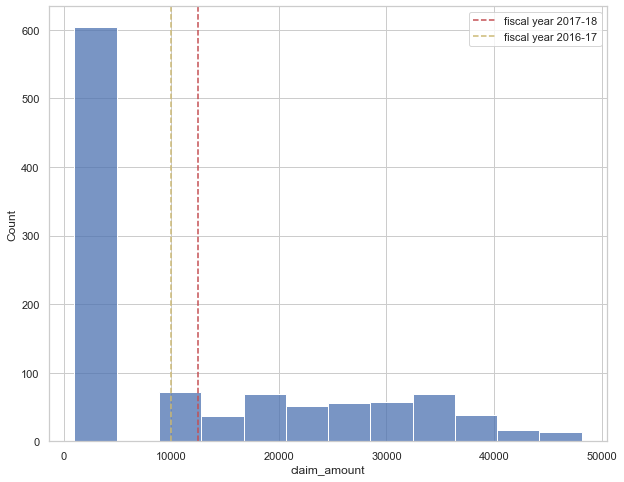

In [131]:
plt.figure(figsize=(10,8))
sns.histplot(insurance_data.claim_amount)
plt.axvline(insurance_data.claim_amount.mean(),linestyle='--',color='r',label='fiscal year 2017-18')
plt.axvline(10000,linestyle='--',color='y',label='fiscal year 2016-17')
plt.legend()
plt.show()

In [133]:
stats.ttest_1samp(insurance_data.claim_amount,10000)

Ttest_1sampResult(statistic=6.186830635443131, pvalue=8.687643050107797e-10)

In [135]:
insurance_data.claim_amount.mean()

12501.72655478778

In [136]:
insurance_data.claim_amount.std()

13319.45577432928

In [140]:
# t value manually 
(12501.72655478778-10000)/(13319.45577432928/1085**0.5)

6.186830635443175

In [137]:
len(insurance_data.claim_amount)

1085

In [143]:
# since pvalue is greater than 5% i.e 8.687643050107797,we consider the null hypothesis H0:population mean>10000


# 19. Is there any difference between age groups and insurance claims?

<AxesSubplot:xlabel='AgeCategory'>

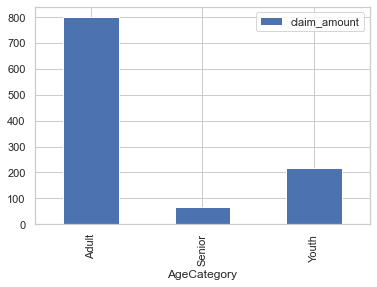

In [185]:
insurance_data.pivot_table(index='AgeCategory',values='claim_amount',aggfunc='count').plot(kind='bar')

In [186]:
#Adult people have claimed very high 
#Senior people have claimed very less 
#Youth people have claimed in between adult and senior

# 20. Is there any relationship between total number of policy claims and the claimed amount?

<AxesSubplot:xlabel='total_policy_claims'>

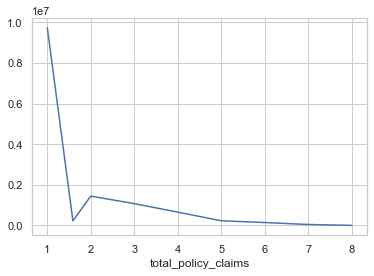

In [222]:
insurance_data.loc[:,['total_policy_claims','claim_amount']].groupby('total_policy_claims')['claim_amount'].sum().plot(kind='line')

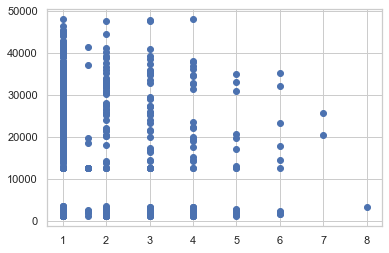

In [226]:
plt.scatter(x=insurance_data.total_policy_claims,y=insurance_data.claim_amount)

In [221]:
insurance_data.total_policy_claims.corr(insurance_data.claim_amount)

-0.021909487420303703

In [223]:
stats.pearsonr(insurance_data.total_policy_claims,insurance_data.claim_amount)

(-0.02190948742030377, 0.4709472448744761)

In [225]:
#since correlation cofficient is less than 0.5 i.e -0.0219, 
#the relation ship between totalpolicy claim and claim amount is very bad 

In [234]:
insurance_data.corr()

,CUST_ID,claim_id,customer_id,claim_amount,total_policy_claims,Day,month,Year2,Year3,AgeFinal
CUST_ID,1.000000,0.072107,0.997971,-0.049152,-0.013224,0.011782,0.013272,0.023044,-0.010855,0.011182
claim_id,0.072107,1.000000,0.072254,0.040408,-0.013760,-0.001401,0.029587,-0.025571,-0.032010,0.030996
customer_id,0.997971,0.072254,1.000000,-0.049252,-0.013251,0.011372,0.012244,0.024383,-0.013646,0.013943
claim_amount,-0.049152,0.040408,-0.049252,1.000000,-0.021909,0.028154,-0.011863,-0.035839,0.003070,-0.002792
total_policy_claims,-0.013224,-0.013760,-0.013251,-0.021909,1.000000,-0.063614,-0.014210,0.011416,0.025774,-0.025327
Day,0.011782,-0.001401,0.011372,0.028154,-0.063614,1.000000,-0.046473,-0.000378,-0.005614,0.000090
month,0.013272,0.029587,0.012244,-0.011863,-0.014210,-0.046473,1.000000,-0.008585,-0.008776,-0.014989
Year2,0.023044,-0.025571,0.024383,-0.035839,0.011416,-0.000378,-0.008585,1.000000,-0.702331,0.701995
Year3,-0.010855,-0.032010,-0.013646,0.003070,0.025774,-0.005614,-0.008776,-0.702331,1.000000,-0.999083
AgeFinal,0.011182,0.030996,0.013943,-0.002792,-0.025327,0.000090,-0.014989,0.701995,-0.999083,1.000000
